(379, 600)


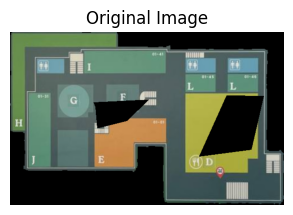

[{'x': 183, 'y': 154}, {'x': 303, 'y': 148}, {'x': 256, 'y': 194}, {'x': 191, 'y': 210}, {'x': 187, 'y': 164}]
1
[{'x': 474, 'y': 139}, {'x': 555, 'y': 140}, {'x': 528, 'y': 257}, {'x': 414, 'y': 272}]
1
(379, 600)


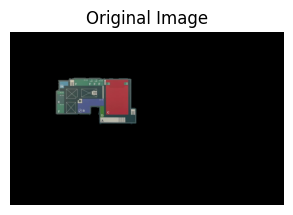

(379, 600)


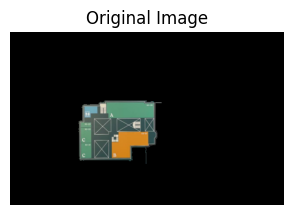

(379, 600)


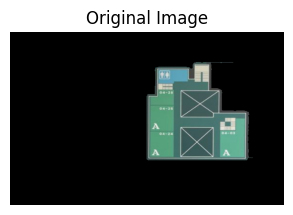

In [19]:
import json
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
import base64


def base64_to_image(base64_string):
    # Remove the header if it exists
    if base64_string.startswith("data:image"):
        base64_string = base64_string.split(",")[1]
    
    # Decode the base64 string into bytes
    image_bytes = base64.b64decode(base64_string)
    
    # Convert the bytes to a NumPy array
    np_arr = np.frombuffer(image_bytes, np.uint8)
    
    # Decode the NumPy array to an image (assuming a color image)
    image = cv2.imdecode(np_arr, cv2.IMREAD_COLOR)
    return image


def plot_image(image):
    print(image.shape[:2])
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

with open("data.json") as f:
    data =json.load(f)
    allRegions = (data["drawnRegions"])
    shapes = (data["shapeLabels"])
    walkways = (data["walkways"])
    for index, imageString in enumerate(walkways):
        regions = allRegions.get(str(index), [])
        shape = shapes.get(str(index), {})
        image = base64_to_image(imageString)
        plot_image(image)
        # print(regions)
        # print(shape)
        for index, region in enumerate(regions):
            print(region)
            regionType = shape.get(str(index), -1)
            print(regionType)

